In [1]:
FHV_table_path = 'monthly_FHV_count.csv'

In [2]:
from io import BytesIO
from zipfile import ZipFile
import requests

url = 'http://web.mta.info/persdashboard/perxml/MTA_Performance_Datall.zip'
content = requests.get(url)

#unzip the content
f = ZipFile(BytesIO(content.content))
f.namelist()

['MTA_Performance_Agencies.csv',
 'MTA_Performance_LIRR.csv',
 'MTA_Performance_MNR.csv',
 'MTA_Performance_MTABUS.csv',
 'MTA_Performance_NYCT.csv',
 'MTA_Performance_TBTA.csv',
 'Performance-MetaData.xlsx',
 'Performance_LIRR.csv',
 'Performance_LIRR.xml',
 'Performance_MNRR.csv',
 'Performance_MNRR.xml',
 'Performance_MTABUS.csv',
 'Performance_MTABUS.xml',
 'Performance_NYCT.csv',
 'Performance_NYCT.xml',
 'Performance_schema.xsd',
 'Performance_TBTA.csv',
 'Performance_TBTA.xml']

In [3]:
import pandas as pd
df1 = pd.read_csv(f.open('Performance_MTABUS.csv'))
df1 = df1[["INDICATOR_NAME", "PERIOD_YEAR", "PERIOD_MONTH", "MONTHLY_ACTUAL"]]
df1.info()
#MTA Bus Ridership

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813 entries, 0 to 1812
Data columns (total 4 columns):
INDICATOR_NAME    1813 non-null object
PERIOD_YEAR       1813 non-null int64
PERIOD_MONTH      1813 non-null int64
MONTHLY_ACTUAL    1813 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 56.7+ KB


In [4]:
#Prepare for FHV regression
mta_df = df1[((df1.PERIOD_YEAR > 2015))&(df1.INDICATOR_NAME == "Total Ridership - MTA Bus ")]
mta_df[:3]

,INDICATOR_NAME,PERIOD_YEAR,PERIOD_MONTH,MONTHLY_ACTUAL
334,Total Ridership - MTA Bus,2016,1,9464783.0
335,Total Ridership - MTA Bus,2016,2,9650946.0
336,Total Ridership - MTA Bus,2016,3,11393621.0


In [5]:
mta_df['Date'] = pd.to_datetime(dict(year=mta_df.PERIOD_YEAR, month=mta_df.PERIOD_MONTH, day=1))
mta_df = mta_df.set_index(['Date'])
mta_df[:3]

/home/user/.virtualenvs/crosscompute/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,INDICATOR_NAME,PERIOD_YEAR,PERIOD_MONTH,MONTHLY_ACTUAL
Date,,,,
2016-01-01,Total Ridership - MTA Bus,2016,1,9464783.0
2016-02-01,Total Ridership - MTA Bus,2016,2,9650946.0
2016-03-01,Total Ridership - MTA Bus,2016,3,11393621.0


In [6]:
df2 = pd.read_csv(f.open('Performance_NYCT.csv'), encoding="iso-8859-1")
df2 = df2[["INDICATOR_NAME", "PERIOD_YEAR", "PERIOD_MONTH", "MONTHLY_ACTUAL"]]
df2.info()
#NYCT Bus Ridership

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9213 entries, 0 to 9212
Data columns (total 4 columns):
INDICATOR_NAME    9213 non-null object
PERIOD_YEAR       9213 non-null int64
PERIOD_MONTH      9213 non-null int64
MONTHLY_ACTUAL    9213 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 288.0+ KB


In [7]:
nyct_df = df2[((df2.PERIOD_YEAR > 2015))&(df2.INDICATOR_NAME == "Total Ridership - NYCT Bus ")]
nyct_df[:3]

,INDICATOR_NAME,PERIOD_YEAR,PERIOD_MONTH,MONTHLY_ACTUAL
6495,Total Ridership - NYCT Bus,2016,1,49049885.0
6496,Total Ridership - NYCT Bus,2016,2,50327673.0
6497,Total Ridership - NYCT Bus,2016,3,58720672.0


In [8]:
nyct_df['Date'] = pd.to_datetime(dict(year=nyct_df.PERIOD_YEAR, month=nyct_df.PERIOD_MONTH, day=1))
nyct_df = nyct_df.set_index(['Date'])
nyct_df[:3]

/home/user/.virtualenvs/crosscompute/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,INDICATOR_NAME,PERIOD_YEAR,PERIOD_MONTH,MONTHLY_ACTUAL
Date,,,,
2016-01-01,Total Ridership - NYCT Bus,2016,1,49049885.0
2016-02-01,Total Ridership - NYCT Bus,2016,2,50327673.0
2016-03-01,Total Ridership - NYCT Bus,2016,3,58720672.0


In [9]:
mta_df[:3]

,INDICATOR_NAME,PERIOD_YEAR,PERIOD_MONTH,MONTHLY_ACTUAL
Date,,,,
2016-01-01,Total Ridership - MTA Bus,2016,1,9464783.0
2016-02-01,Total Ridership - MTA Bus,2016,2,9650946.0
2016-03-01,Total Ridership - MTA Bus,2016,3,11393621.0


In [10]:
mta_df['Ridership'] = mta_df['MONTHLY_ACTUAL'].values + nyct_df['MONTHLY_ACTUAL'].values
bus_reg = mta_df['Ridership']
bus_reg[:3]
bus_reg.to_csv('monthly_bus_count.csv', index = False)

/home/user/.virtualenvs/crosscompute/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


/home/user/.virtualenvs/crosscompute/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


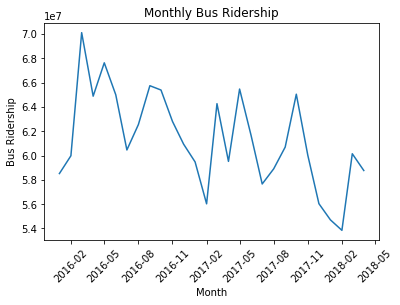

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(bus_reg)
plt.title("Monthly Bus Ridership")
plt.xlabel("Month")
plt.ylabel("Bus Ridership")
plt.xticks(rotation = 45)
plt.savefig('bus.png')
plt.show()

In [12]:
mta_month = df1[df1['INDICATOR_NAME'] == 'Total Ridership - MTA Bus ']
mta_month.describe()

,PERIOD_YEAR,PERIOD_MONTH,MONTHLY_ACTUAL
count,124.000000,124.000000,1.240000e+02
mean,2012.677419,6.370968,1.016879e+07
std,3.000131,3.488582,6.443227e+05
min,2008.000000,1.000000,8.458189e+06
25%,2010.000000,3.000000,9.688108e+06
50%,2013.000000,6.000000,1.016291e+07
75%,2015.000000,9.000000,1.057170e+07
max,2018.000000,12.000000,1.181045e+07


In [13]:
df3 = df2[df2['INDICATOR_NAME'] == 'Total Ridership - NYCT Bus ']
df3.describe()

,PERIOD_YEAR,PERIOD_MONTH,MONTHLY_ACTUAL
count,124.000000,124.000000,1.240000e+02
mean,2012.677419,6.370968,5.580735e+07
std,3.000131,3.488582,4.850119e+06
min,2008.000000,1.000000,4.468676e+07
25%,2010.000000,3.000000,5.238607e+07
50%,2013.000000,6.000000,5.536962e+07
75%,2015.000000,9.000000,5.921923e+07
max,2018.000000,12.000000,6.739000e+07


In [14]:
df3 = df3.reset_index(drop=True)
df3[:5]

,INDICATOR_NAME,PERIOD_YEAR,PERIOD_MONTH,MONTHLY_ACTUAL
0,Total Ridership - NYCT Bus,2008,1,60889506.0
1,Total Ridership - NYCT Bus,2008,2,57631961.0
2,Total Ridership - NYCT Bus,2008,3,64147814.0
3,Total Ridership - NYCT Bus,2008,4,63701847.0
4,Total Ridership - NYCT Bus,2008,5,65582363.0


In [15]:
mta_month = mta_month.reset_index(drop=True)
mta_month[:5]

,INDICATOR_NAME,PERIOD_YEAR,PERIOD_MONTH,MONTHLY_ACTUAL
0,Total Ridership - MTA Bus,2008,1,9528068.0
1,Total Ridership - MTA Bus,2008,2,9087705.0
2,Total Ridership - MTA Bus,2008,3,10145256.0
3,Total Ridership - MTA Bus,2008,4,10234615.0
4,Total Ridership - MTA Bus,2008,5,10491142.0


In [16]:
mta_month['MONTHLY_ACTUAL'] = mta_month['MONTHLY_ACTUAL'].add(df3['MONTHLY_ACTUAL'])
mta_month = mta_month.drop(columns = ['INDICATOR_NAME'])
mta_month[:5]

,PERIOD_YEAR,PERIOD_MONTH,MONTHLY_ACTUAL
0,2008,1,70417574.0
1,2008,2,66719666.0
2,2008,3,74293070.0
3,2008,4,73936462.0
4,2008,5,76073505.0


In [17]:
avg_monthly_count = mta_month.groupby('PERIOD_MONTH').mean() 
avg_monthly_count[:5]

,PERIOD_YEAR,MONTHLY_ACTUAL
PERIOD_MONTH,,
1,2013.0,6.214447e+07
2,2013.0,6.006002e+07
3,2013.0,7.002811e+07
4,2013.0,6.695461e+07
5,2012.5,7.071510e+07


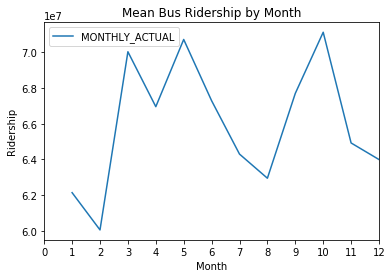

In [18]:
avg_monthly_count = avg_monthly_count[['MONTHLY_ACTUAL']]
fig_month = avg_monthly_count.plot()

plt.title('Mean Bus Ridership by Month')
plt.xlabel('Month')
plt.ylabel('Ridership')
plt.xticks(range(0,13))
plt.show()

In [19]:
avg_monthly_count.to_csv('ARIMAbusmonthly.csv')

In [21]:
fhv_reg = pd.read_csv(FHV_table_path)
fhv_reg[:3]

,Total Dispatched Trips
0,8323057
1,9330832
2,9548284


In [22]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = fhv_reg[0:28].values
y = bus_reg.values

In [20]:
from sklearn.model_selection import cross_val_score
models = []
scores = []

def train(model, X):
    model.fit(X, y)
    models.append(model)
    score = cross_val_score(
        model, X, y, cv=3,
        scoring='neg_mean_absolute_error',
    ).mean()
    scores.append(score)
    return score

In [25]:
train(LinearRegression(),x)

-2943038.958589543

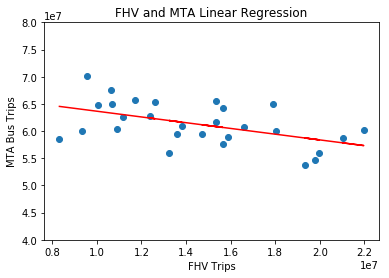

In [26]:
x = x.reshape(28,1)
y = y.reshape(28,1)

model.fit(x,y)
plt.scatter(x,y)
plt.title("FHV and MTA Linear Regression")
plt.xlabel("FHV Trips")
plt.ylabel("MTA Bus Trips")
plt.ylim(4e7,8e7)
plt.plot(x,model.predict(x),color="red")
plt.show()

In [41]:
from scipy import stats 
stats.pearsonr(x,y)

(array([-0.50887474]), array([0.00568559]))

In [24]:
from datetime import timedelta
x1 = pd.DataFrame(data=fhv_reg[0:28])
x1['b'] = fhv_reg[1:29].values
x1['c'] = fhv_reg[2:30].values
x1.columns = ['Month - 2','Month - 1','Current Month']
x1[:3]

,Month - 2,Month - 1,Current Month
0,8323057,9330832,9548284
1,9330832,9548284,10065141
2,9548284,10065141,10652598


In [42]:
train(LinearRegression(),x1)

-2835537.1678167637

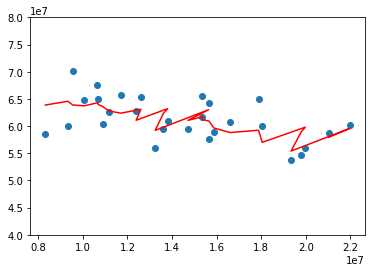

In [43]:
model.fit(x1,y)
y1 = model.predict(x1)
plt.scatter(x,y)
plt.ylim(4e7,8e7)
plt.plot(x,y1,color="red")
plt.show()

In [46]:
from sklearn.linear_model import LassoLars
model = LassoLars()

In [47]:
train(model,x1)

-2835525.865039704

In [49]:
# Save model
from pickle import dump
dump(model, open('model1.pkl', 'wb'))
x1.to_csv('monthly_FHV_count_crossval.csv', index = False)

In [50]:
ls -l

total 1472
-rw-r--r--. 1 user user   5704 Feb 23 04:18  16data.csv
-rw-r--r--. 1 user user   3539 Feb 23 03:07  2016_For_Hire_Vehicle_Trip_Data.csv
-rw-r--r--. 1 user user 879094 Feb 23 03:52  2016_tlc_factbook.xlsx
-rw-r--r--. 1 user user    217 Mar  1 18:03  ARIMAbusmonthly.csv
-rw-r--r--. 1 user user  24435 Mar  1 17:38  bus.png
-rw-r--r--. 1 user user  44598 Mar  1 18:12 'Bus Prediction Tool (v1).ipynb'
-rw-r--r--. 1 user user   3404 Mar  1 18:12 'Bus Prediction Tool (v2).ipynb'
-rw-r--r--. 1 user user 129438 Mar  1 18:12 'FHV-bus trips regression.ipynb'
-rw-r--r--. 1 user user  44592 Feb 27 19:50 'FHV data cleansing, prep bus data.ipynb'
-rw-r--r--. 1 user user   3775 Feb 22 01:21  fhvincome.csv
-rw-r--r--. 1 user user   5623 Feb 27 20:06 'FHV-Income Hist(log).png'
-rw-r--r--. 1 user user  10217 Feb 27 20:06 'FHV-Income Hist.png'
-rw-r--r--. 1 user user  17763 Feb 27 20:11  fhv-income-reg-log.png
-rw-r--r--. 1 user user  20511 Feb 27 20:11  fhv-income-reg.png
-rw-r--r--. 1 user us

model.fit(x=x,y=y)